# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading dataset

In [5]:
df = pd.read_csv('hotel_bookings 2.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015


# EDA and Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Correcting datatype of `reservation_status_date` column

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='mixed')

In [11]:
df['reservation_month'] = df['reservation_status_date'].dt.month
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07,3


## Understanding unique categorical/object format values in rows ->

In [13]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [14]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

## Finding the number of missing values

In [16]:
missing_df = pd.concat([df.isnull().sum(), ((df.isnull().sum())/(len(df)))*100], axis = 1, keys=['miss_num', 'miss%'])
missing_df

,miss_num,miss%
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [17]:
df = df.drop(['company', 'agent'], axis = 1)
df = df.dropna()

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Checking and removing outliers

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_month
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552,6.386356
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00,3.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00,6.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00,9.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00,12.000000
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN,3.390740


<Axes: >

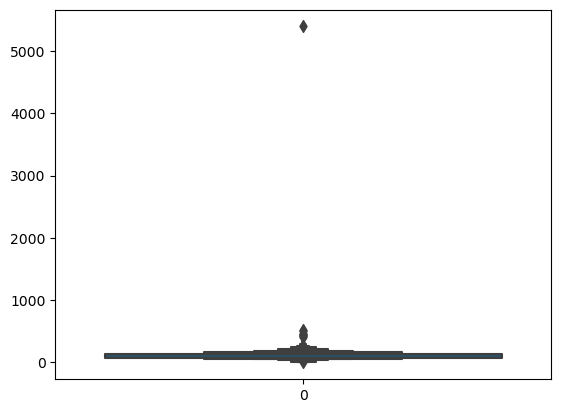

In [21]:
sns.boxenplot(df['adr'])
# outlier spotted in adr

In [22]:
df = df[df['adr']<5000]

# Creating Data Visualizations

In [24]:
cancel_df = ((df['is_canceled'].value_counts())/len(df))*100
# alternatively we can use --->>  (df['is_canceled'].value_counts(normalize=True))*100
cancel_df

is_canceled
0    62.865337
1    37.134663
Name: count, dtype: float64

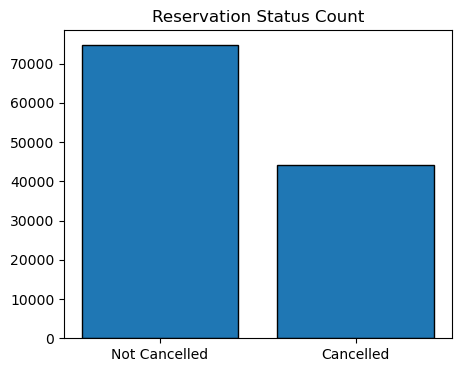

In [25]:
plt.figure(figsize= (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='k')
plt.show()

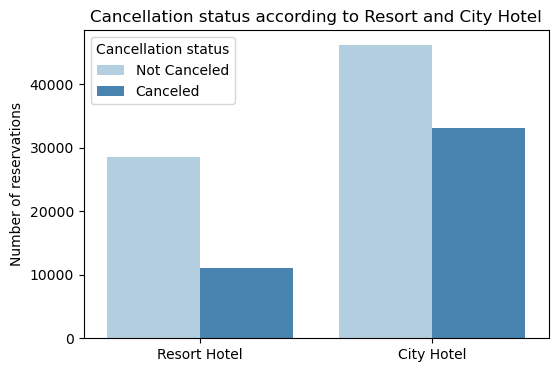

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Blues')
plt.legend(['Not Canceled','Canceled'], title='Cancellation status')
plt.title('Cancellation status according to Resort and City Hotel')
plt.xlabel('')
plt.ylabel('Number of reservations')
plt.show()

### Finding how many % of reservations have been *cancelled* in Resort Hotel and City Hotel respectively

In [28]:
resort_hotel_df = df[df['hotel']=='Resort Hotel']
resort_hotel_df['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [29]:
city_hotel_df = df[df['hotel']=='City Hotel']
city_hotel_df['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [30]:
rh_df = resort_hotel_df.groupby('reservation_status_date')[['adr']].mean()
ch_df = city_hotel_df.groupby('reservation_status_date')[['adr']].mean()

### Analyzing Avg Daily Rate (ADR) in Resort Hotels and City Hotels

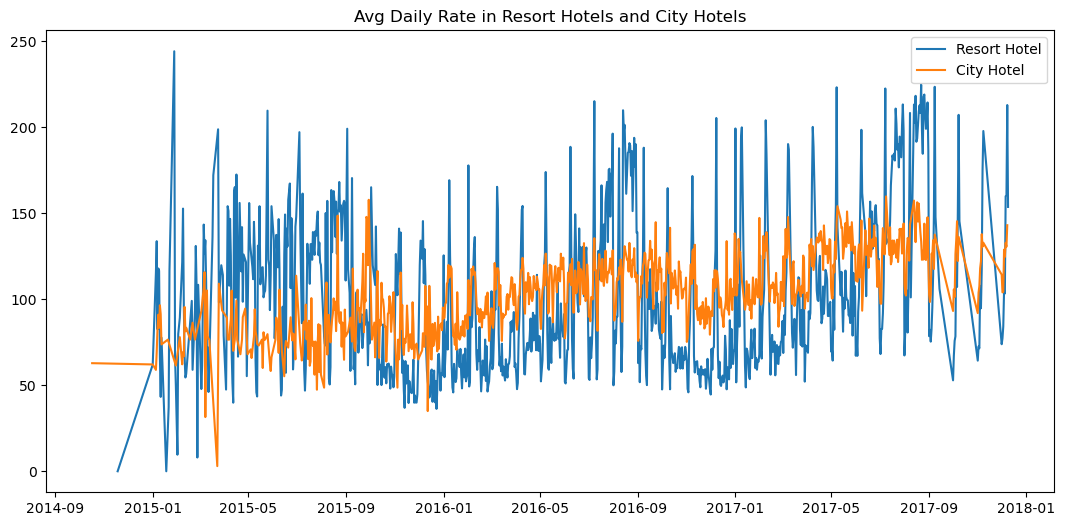

In [32]:
plt.figure(figsize=(13,6))
plt.title('Avg Daily Rate in Resort Hotels and City Hotels')
plt.plot(rh_df.index, rh_df['adr'], label='Resort Hotel')
plt.plot(ch_df.index, ch_df['adr'], label='City Hotel')
plt.legend()
plt.show()

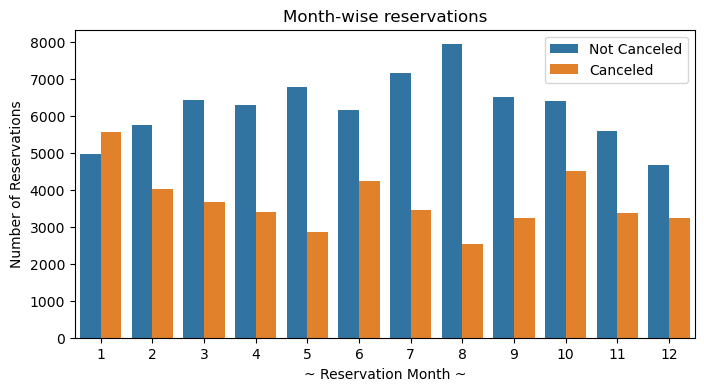

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='reservation_month', data=df, hue='is_canceled')
plt.title('Month-wise reservations')
plt.xlabel('~ Reservation Month ~')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

Max. cancellations occur in January & Least occur in August

Max. ticket booking occur in August and least in December

## ADR per month for canceled reservations

    Basically we are checking in which month-wise what was the trend of ADR when reservations were CANCELLED

In [36]:
adr_by_month = df[df['is_canceled']==1]['adr'].groupby(df['reservation_month']).sum()
adr_by_month.values

array([532660.54, 399081.98, 419319.79, 399361.2 , 343229.69, 468827.36,
       387597.85, 296665.4 , 340233.39, 384742.47, 331389.62, 329229.6 ])

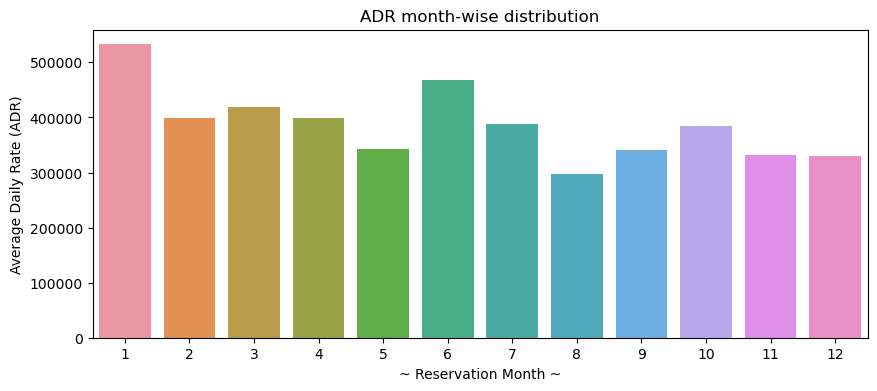

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x=adr_by_month.index, y=adr_by_month.values)
plt.xlabel('~ Reservation Month ~')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR month-wise distribution')
plt.show()

### Hence our assumption is correct that cancelation occurs more when ADR is high
- We can see ADR is highest in January -> Cancellations are HIGHEST in January
- ADR is lowest in August -> Cancelation is LOWEST in August

## Checking the cancelation rate distribution according to number of days in waitlist

In [40]:
print('Max -' , df['days_in_waiting_list'].max() ,
      '\nMin -', df['days_in_waiting_list'].min(),
      '\nMean -', df['days_in_waiting_list'].mean().round(2))

Max - 391 
Min - 0 
Mean - 2.33


In [41]:
df[df['is_canceled']==1]['days_in_waiting_list'].mean()

3.569894908497916

In [42]:
df[df['is_canceled']==0]['days_in_waiting_list'].mean()

1.598822663723326

### We can observe that cancellation rate is higher when customers have to wait longer in waiting list
Customers cancel at **LOWER** frequency when number of days in waiting list is less than **1.6**

## Checking cancelation rates according to country

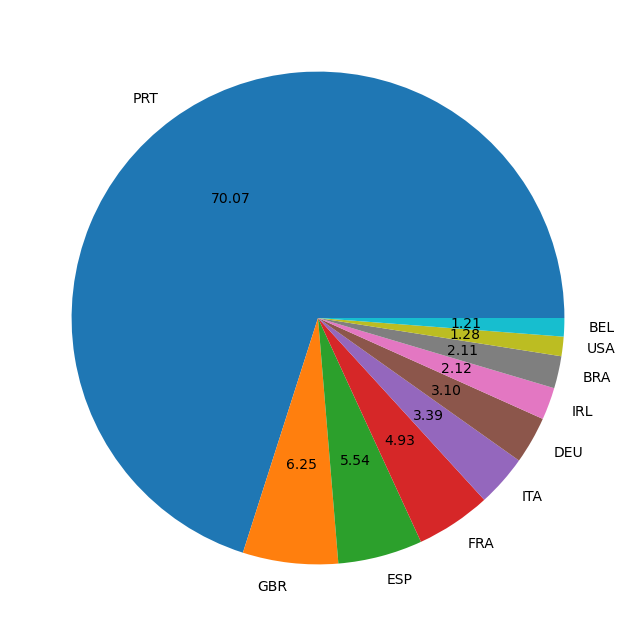

In [45]:
top_10_countries = df[df['is_canceled']==1]['country'].value_counts(normalize=True).head(10)*100
plt.figure(figsize=(8,8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%.2f')
plt.show()

### Hence 70% of cancelations are occuring in PRT(Portugal)
Thus Hotels in PRT should focus on either :
- Lowering prices
- Improving quality of services
- Better advertisements in PRT

## Checking Distribution Channels and how reservations are varying according to this

In [48]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1


In [49]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

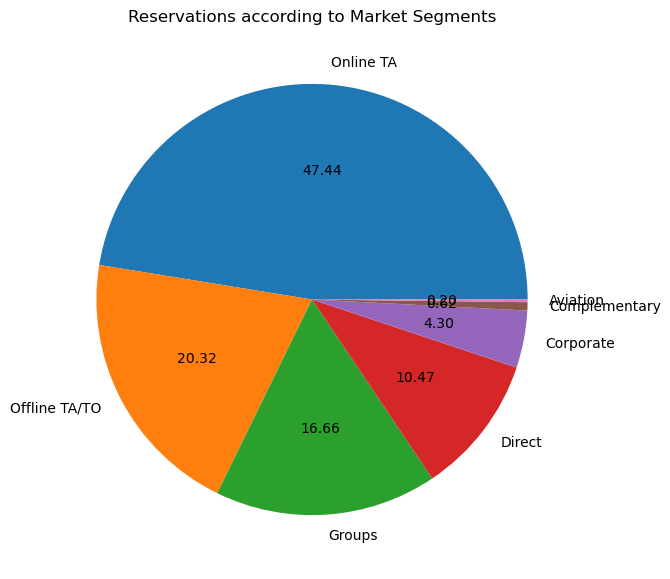

In [50]:
mkt_sgmt = df['market_segment'].value_counts(normalize=True)*100
plt.figure(figsize=(7,7))
plt.pie(mkt_sgmt, labels=mkt_sgmt.index, autopct="%.2f")
plt.title('Reservations according to Market Segments')
plt.show()